In [79]:
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline


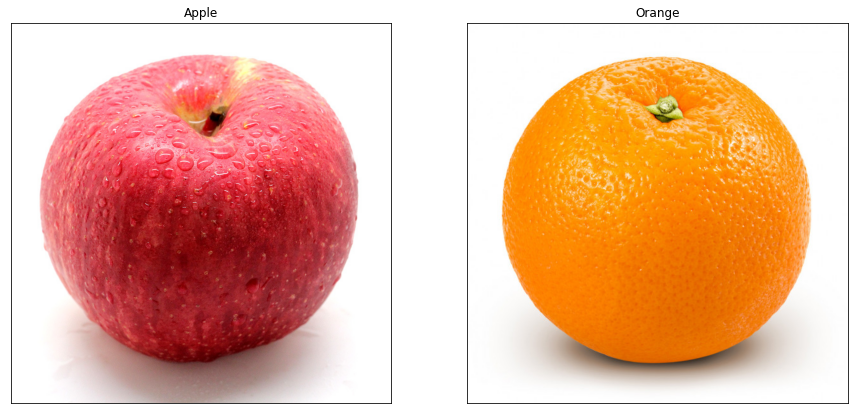

In [144]:
apple = plt.imread("red_apple.jpg")
orange = plt.imread("orange1.jpg")

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(apple)
plt.title("Apple")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(orange)
plt.title("Orange")
plt.xticks([])
plt.yticks([])
plt.show()

In [145]:
width = 600
height = 600
dim = (width, height)
apple = cv2.resize(apple, dim, interpolation = cv2.INTER_AREA)
orange = cv2.resize(orange, dim, interpolation = cv2.INTER_AREA)

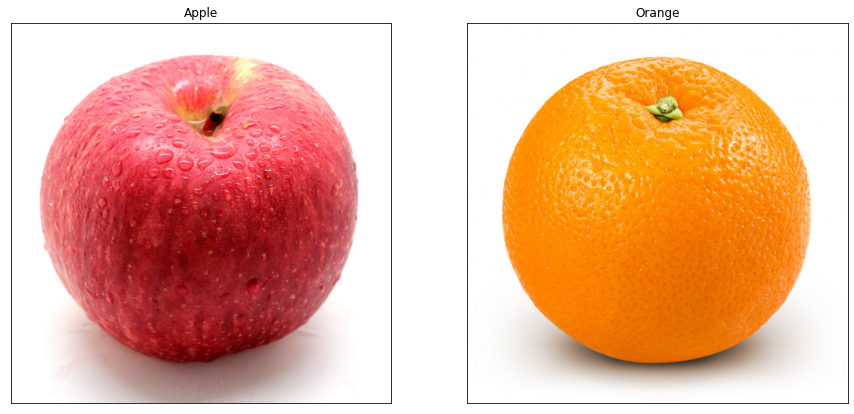

In [146]:
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(apple)
plt.title("Apple")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(orange)
plt.title("Orange")
plt.xticks([])
plt.yticks([])
plt.show()

In [86]:
a = 1/3
b = 1/4
c = 1/4-a/2
print(a,b,c, a + 2*b + 2*c)

kernel_1D = [c, b, a, b, c]


0.3333333333333333 0.25 0.08333333333333334 1.0


In [87]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


In [88]:
def reduce(img, kernel):
  new_img = img.copy()
  k = int(len(kernel) / 2)
  row = len(img)
  col = len(img[0])
  # print(row, col)
  new_img = img.copy()
  # REDUCE across rows to get a r x(c/2) image
  for i in range(0, row ):
    for j in range(0, col):
      if j < k:
        pixel_matrix = img[i, j:j+2+1]
        new_kernel = [a, 2 * b, 2 * c]
        val_m = pixel_matrix * new_kernel
        val = val_m.sum()
        new_img[i][j] = val
        continue
      elif j >= col - k:
        pixel_matrix = img[i, j-2:j+1]
        new_kernel = [2*c, 2*b, a]
        val_m = pixel_matrix * new_kernel
        val = val_m.sum()
        new_img[i][j] = val
        continue
      pixel_matrix = img[i, j - k : j + k + 1]
      val_m = pixel_matrix * kernel
      val = val_m.sum()
      new_img[i][j] = val
  
  new_img = new_img[::, ::2]
  img = new_img.copy()
  row = len(img)
  col = len(img[0])
  # REDUCE across columns to get a(r/2) x (c/2) image 
  for i in range(0, row):
    for j in range(0, col):
      if i < k:
        pixel_matrix = img[i:i+2+1, j]
        new_kernel = [a, 2 * b, 2 * c]
        val_m = pixel_matrix * new_kernel
        val = val_m.sum()
        new_img[i][j] = val
        continue
      elif i >= row - k:
        pixel_matrix = img[i-2:i+1, j]
        new_kernel = [2*c, 2*b, a]
        val_m = pixel_matrix * new_kernel
        val = val_m.sum()
        new_img[i][j] = val
        continue
      pixel_matrix = img[i - k: i + k + 1,j]
      val_m = pixel_matrix * kernel
      val = val_m.sum()
      new_img[i][j] = val
  return new_img[::2,::]
  

In [89]:
def construct_reduce_pyramid(img, pyramid_sz=4):
  g_l = img.copy()
  pyramid = []
  pyramid.append(g_l)
  for i in range(1, pyramid_sz):
    print("Reduce start", i)
    reduced_img = reduce(g_l, kernel_1D)
    pyramid.append(reduced_img)
    g_l = reduced_img
  print("Finish")
  return pyramid

In [90]:
def expand_boundary_update_row(j, c1, g_1, kernel):
  sum = 0
  if j < k:
    if j == 1:
      p = -1
      sum = sum + (kernel[p + 2] * g_1[i][int((j - p) / 2)])
      p = 1
      sum = sum + (kernel[p + 2] * g_1[i][int((j - p) / 2)])
    else:
      p = -2
      sum = sum + (2 * kernel[p + 2] * g_1[i][int((j - p) / 2)])
      p = 0
      sum = sum + (kernel[p + 2] * g_1[i][int((j - p) / 2)])
  elif j >= c1-k:
    if j % 2 == 0 and j == c1 - 2:
      p = 2
      sum = sum + (2 * kernel[p + 2] * g_1[i][int((j - p) / 2)])
      p = 0
      sum = sum + (kernel[p + 2] * g_1[i][int((j - p) / 2)])
    elif j % 2 == 0 and j == c1 - 1:
      p=2
      sum = sum + (0.5 * g_1[i][int((j - p) / 2)])
    elif j % 2 == 1:
      p = 1
      sum = sum + (2 * kernel[p + 2] * g_1[i][int((j - p) / 2)])
  return sum

def expand_boundary_update_col(i, r1, g_1, kernel):
  sum = 0
  if i < k:
    if i == 1:
      p = -1
      sum = sum + (kernel[p + 2] * g_1[int((i - p) / 2)][j])
      p = 1
      sum = sum + (kernel[p + 2] * g_1[int((i - p) / 2)][j])
    else:
      p = -2
      sum = sum + (2 * kernel[p + 2] * g_1[int((i - p) / 2)][j])
      p = 0
      sum = sum + (kernel[p + 2] * g_1[int((i - p) / 2)][j])
  elif i >= r1-k:
    if i % 2 == 0 and i == r1 - 2:
      p = 2
      sum = sum + (2 * kernel[p + 2] * g_1[int((i - p) / 2)][j])
      p = 0
      sum = sum + (kernel[p + 2] * g_1[int((i - p) / 2)][j])
    elif i % 2 == 0 and i == r1 - 1:
      p=2
      sum = sum + (0.5 * g_1[int((i - p) / 2)][j])
    elif i % 2 == 1:
      p = 1
      sum = sum + (2 * kernel[p + 2] * g_1[int((i - p) / 2)][j])
  return sum


In [91]:
def expand(g_0, g_1, kernel):
  """
  g_0 => expanded size image
  g_1 => which image being expanded
  """
  r1 = len(g_0)
  c1 = len(g_0[0])
  r2 = len(g_1)
  c2 = len(g_1[1])

  # print(r1, c1, r2, c2)

  expand_img = np.zeros((r1, c1))
  k = int(len(kernel) / 2)
  # EXPAND across rows to get a rx(2*c) image
  for i in range(0, r2):
    for j in range(0, c1):
      sum = 0
      if j < k:
        if j % 2 == 0:
          sum = sum + (kernel[0] * g_1[i][0])
          sum = sum + (kernel[2] * g_1[i][1])
          sum = sum + (kernel[4] * g_1[i][2])
        else:
          sum = sum + (kernel[1] * g_1[i][1])
          sum = sum + (kernel[3] * g_1[i][2])
        expand_img[i,j] = 2 * sum
        continue
      elif j >= c1 - k:
        if j % 2 == 0:
          sum = sum + (kernel[4] * g_1[i][c2-3])
          sum = sum + (kernel[2] * g_1[i][c2-2])
          sum = sum + (kernel[0] * g_1[i][c2-1])
        else:
          sum = sum + (kernel[3] * g_1[i][c2-2])
          sum = sum + (kernel[1] * g_1[i][c2-1])
        expand_img[i,j] = 2 * sum
        continue
      for p in range(-k, k + 1):
        try:
          if j % 2 == 0 and p % 2 == 0:
            sum = sum + (kernel[p + 2] * g_1[i][int((j - p) / 2)])
          elif j % 2 == 1 and p % 2 == 1:
            sum = sum + (kernel[p + 2] * g_1[i][int((j - p) / 2)])
        except:
          print(i, j, p)
          return
      expand_img[i,j] = 2 * sum
  # print(expand_img.max())
  g_1 = expand_img.copy()
  # EXPAND across cols to get a (2*r)x(2*c) image
  for i in range(0, r1):
    for j in range(0, c1):
      sum = 0
      if i < k:
        if i % 2 == 0:
          sum = sum + (kernel[0] * g_1[0][j])
          sum = sum + (kernel[2] * g_1[1][j])
          sum = sum + (kernel[4] * g_1[2][j])
        else:
          sum = sum + (kernel[1] * g_1[1][j])
          sum = sum + (kernel[3] * g_1[2][j])
        expand_img[i,j] = 2 * sum
        continue
      elif i >= r1 - k:
        if i % 2 == 0:
          sum = sum + (kernel[4] * g_1[r2-3][j])
          sum = sum + (kernel[2] * g_1[r2-2][j])
          sum = sum + (kernel[0] * g_1[r2-1][j])
        else:
          sum = sum + (kernel[3] * g_1[r2-2][j])
          sum = sum + (kernel[1] * g_1[r2-1][j])
        expand_img[i,j] = 2 * sum
        continue
      for p in range(-k, k + 1):
        try:
          if i % 2 == 0 and p % 2 == 0:
            sum = sum + (kernel[p + 2] * g_1[int((i - p) / 2)][j])
          elif i % 2 == 1 and p % 2 == 1:
            sum = sum + (kernel[p + 2] * g_1[int((i - p) / 2)][j])
        except:
          print(i, j, p)
          return
      expand_img[i,j] = 2 * sum
  # print(expand_img.max())
  return expand_img



In [92]:
def construct_expand_pyramid(reduce_pyramid):
  expand_pyramid = []
  for i in range(0, len(reduce_pyramid)-1):
    print("Start expand", i)
    g_0 = reduce_pyramid[i]
    g_1 = reduce_pyramid[i + 1]
    expand_g1 = expand(g_0, g_1, kernel_1D)
    expand_pyramid.append(expand_g1)
  return expand_pyramid


In [93]:
def construct_laplacian_pyramid(reduce_pyramid, expand_pyramid):
  laplacian_pyramid = []
  for i in range(len(expand_pyramid)):
    g_0 = reduce_pyramid[i]
    expand_g1 = expand_pyramid[i]
    l_i = g_0 - expand_g1
    laplacian_pyramid.append(l_i)
  return laplacian_pyramid

In [94]:
def plot_pyramid(pyramid):

  sz = len(pyramid)
  c = 3
  r = max(2,round(sz/c))

  f, axarr = plt.subplots(r, c)
  f.set_figwidth(20)
  f.set_figheight(15)
  i = 0
  j = 0
  for k in range(sz):
    axarr[i,j].imshow(pyramid[k], cmap='gray')
    j = j + 1
    if(k % c == c-1):
      i = i + 1
      j = 0

In [147]:
apple_img = rgb2gray(apple)
orange_img = rgb2gray(orange)

In [148]:
print(apple.max(), orange.max(), apple.min(), orange.min())
print(apple_img.max(), orange_img.max())

255 255 0 0
254.97449999999998 254.97449999999998


In [149]:
apple_gaussian_pyramid = construct_reduce_pyramid(apple_img, pyramid_sz=5)

Reduce start 1
Reduce start 2
Reduce start 3
Reduce start 4
Finish


In [150]:
orange_gaussian_pyramid = construct_reduce_pyramid(orange_img, pyramid_sz=5)

Reduce start 1
Reduce start 2
Reduce start 3
Reduce start 4
Finish


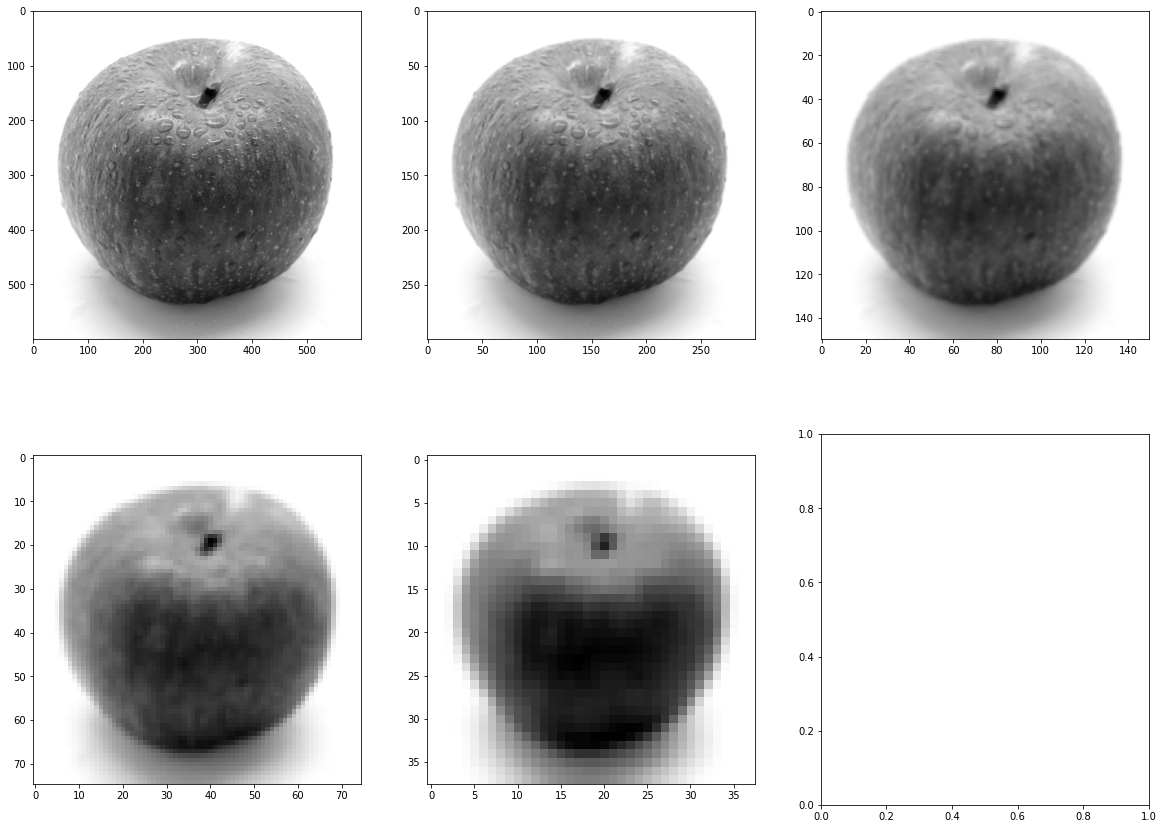

In [151]:
plot_pyramid(apple_gaussian_pyramid)

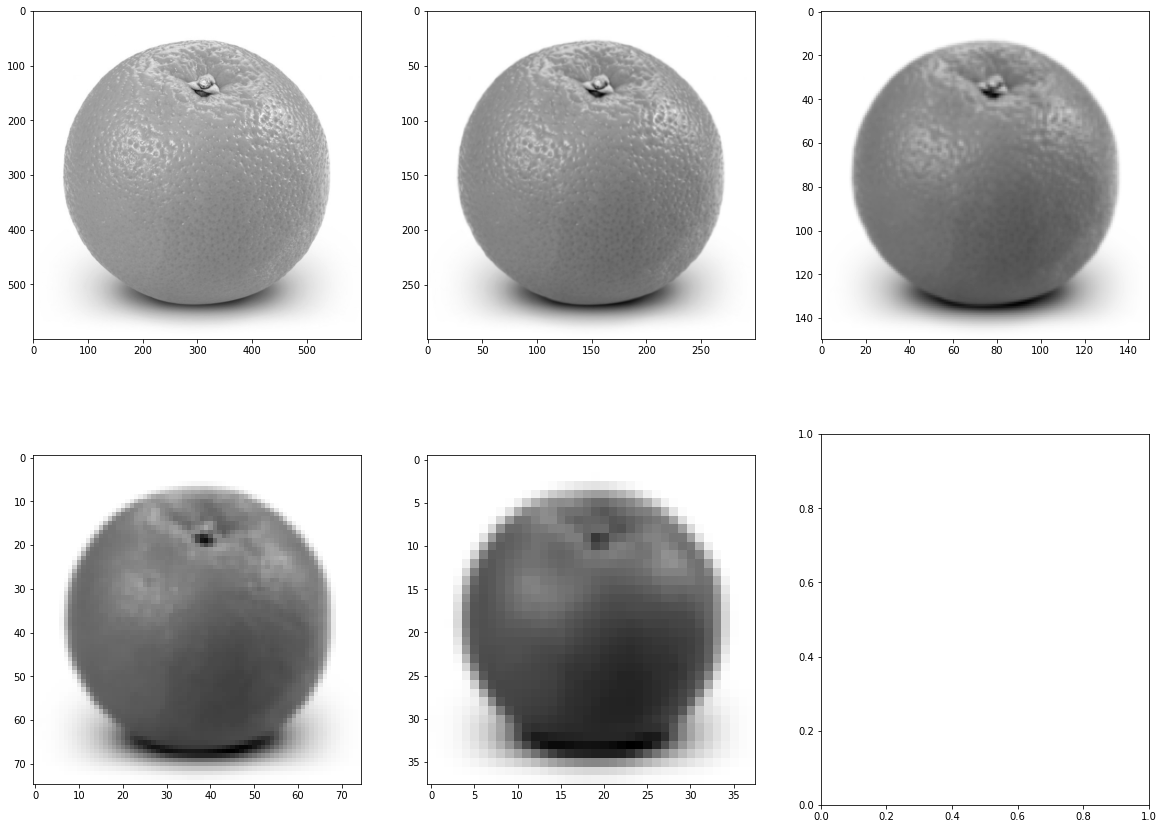

In [152]:
plot_pyramid(orange_gaussian_pyramid)

In [153]:
apple_expand_pyramid = construct_expand_pyramid(apple_gaussian_pyramid)

Start expand 0
Start expand 1
Start expand 2
Start expand 3


In [154]:
orange_expand_pyramid = construct_expand_pyramid(orange_gaussian_pyramid)

Start expand 0
Start expand 1
Start expand 2
Start expand 3


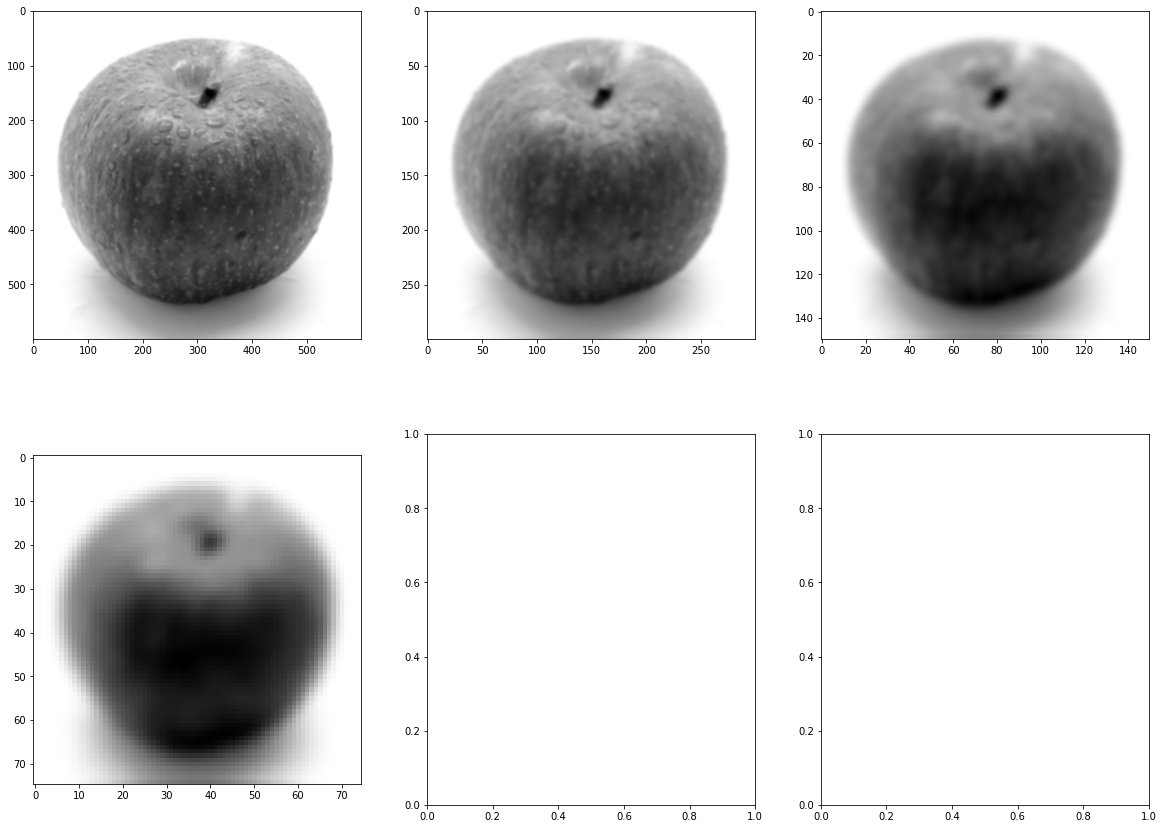

In [155]:
plot_pyramid(apple_expand_pyramid)

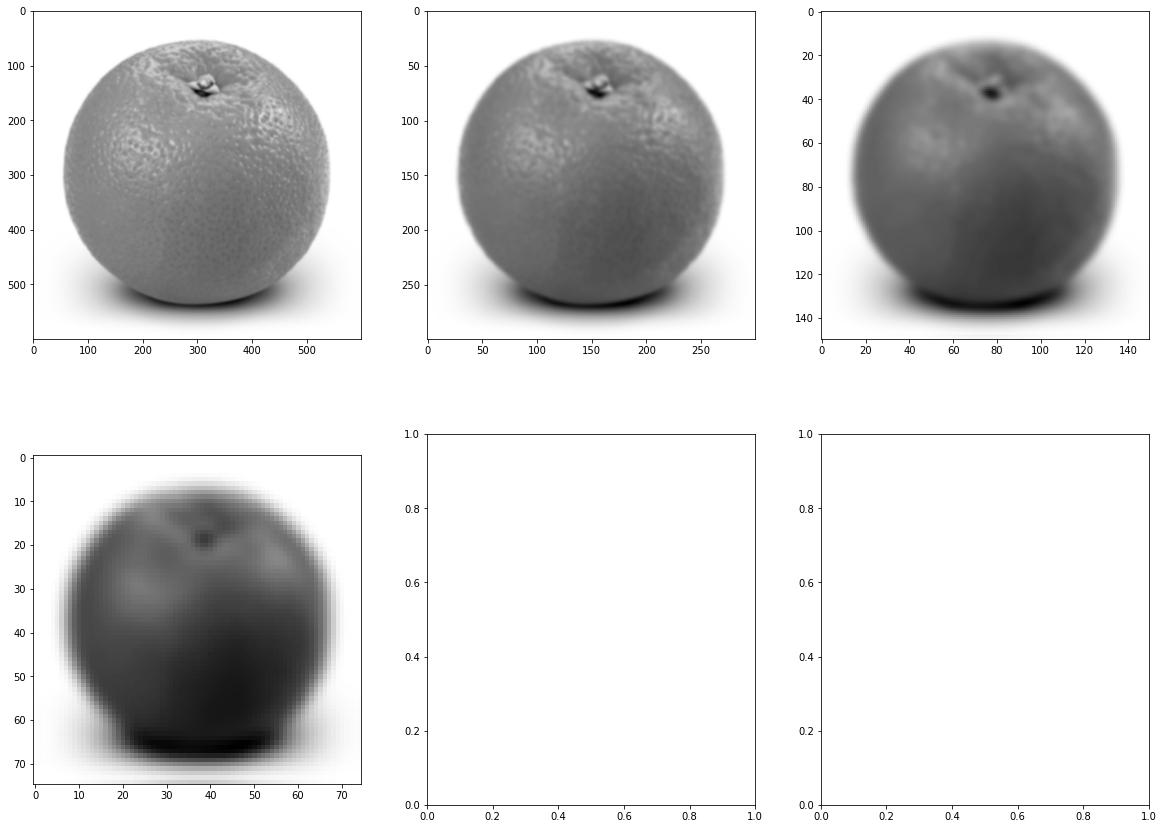

In [156]:
plot_pyramid(orange_expand_pyramid)

In [157]:
apple_laplacian_pyramid = construct_laplacian_pyramid(apple_gaussian_pyramid, apple_expand_pyramid)


In [158]:
orange_laplacian_pyramid = construct_laplacian_pyramid(orange_gaussian_pyramid, orange_expand_pyramid)


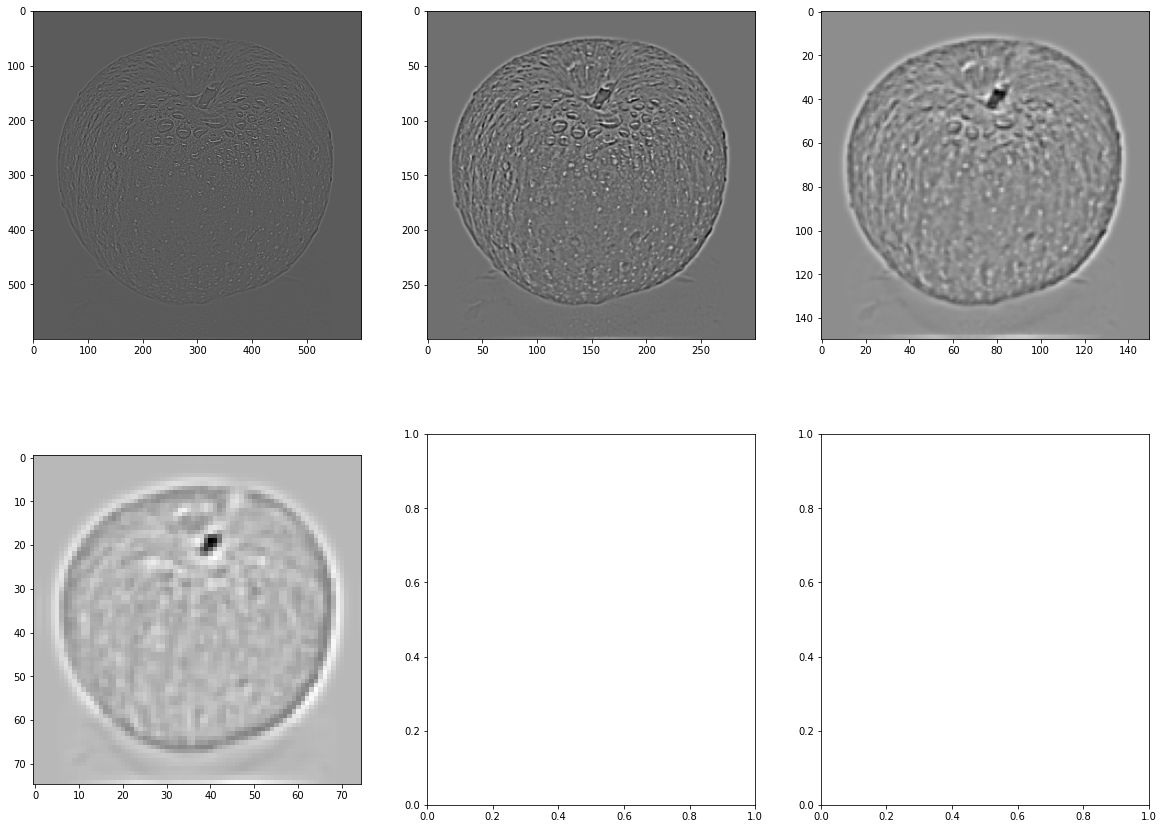

In [159]:
plot_pyramid(apple_laplacian_pyramid)

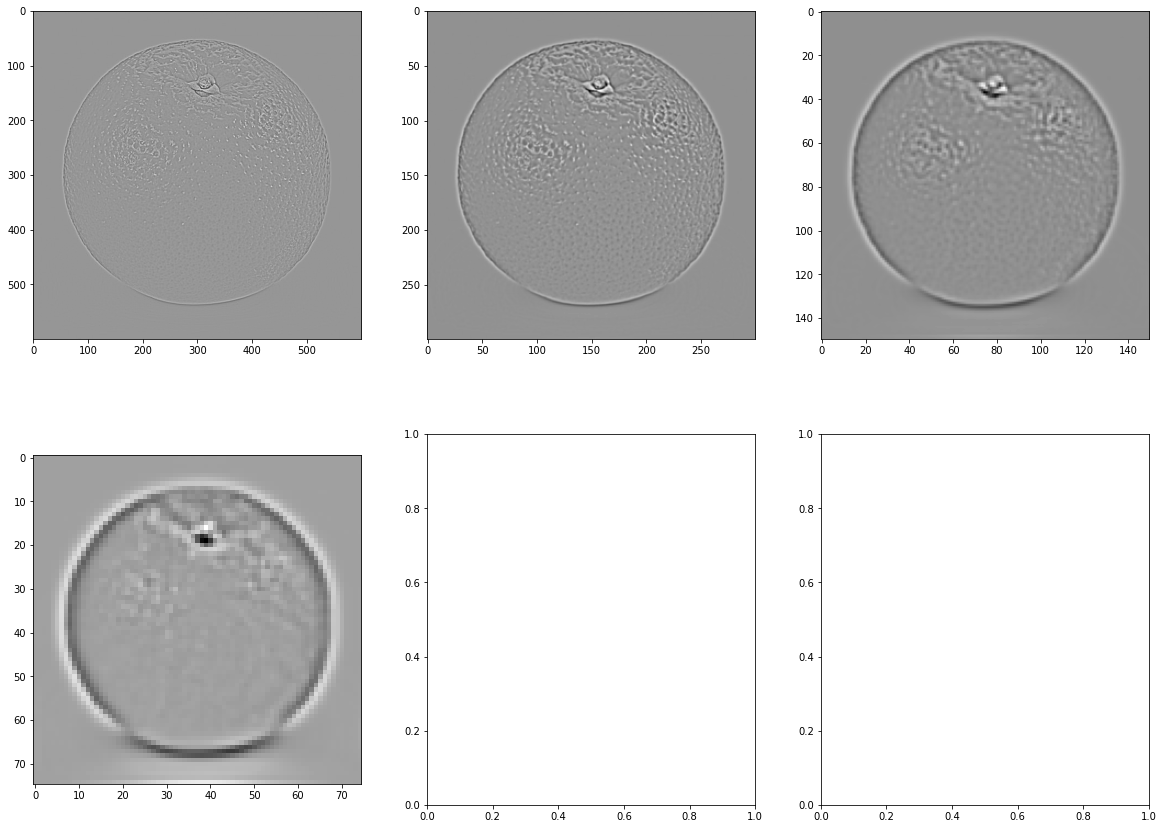

In [160]:
plot_pyramid(orange_laplacian_pyramid)

In [174]:
mask = np.zeros((height, width))
for i in range(height):
  for j in range(int(2 * width / 3)):
    mask[i][j] = 1


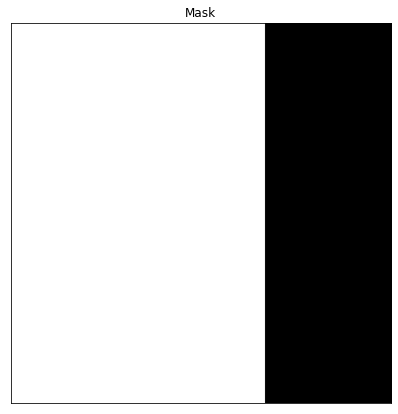

In [175]:
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.xticks([])
plt.yticks([])
plt.show()

In [176]:
mask_gaussian_pyramid = construct_reduce_pyramid(mask, pyramid_sz=5)


Reduce start 1
Reduce start 2
Reduce start 3
Reduce start 4
Finish


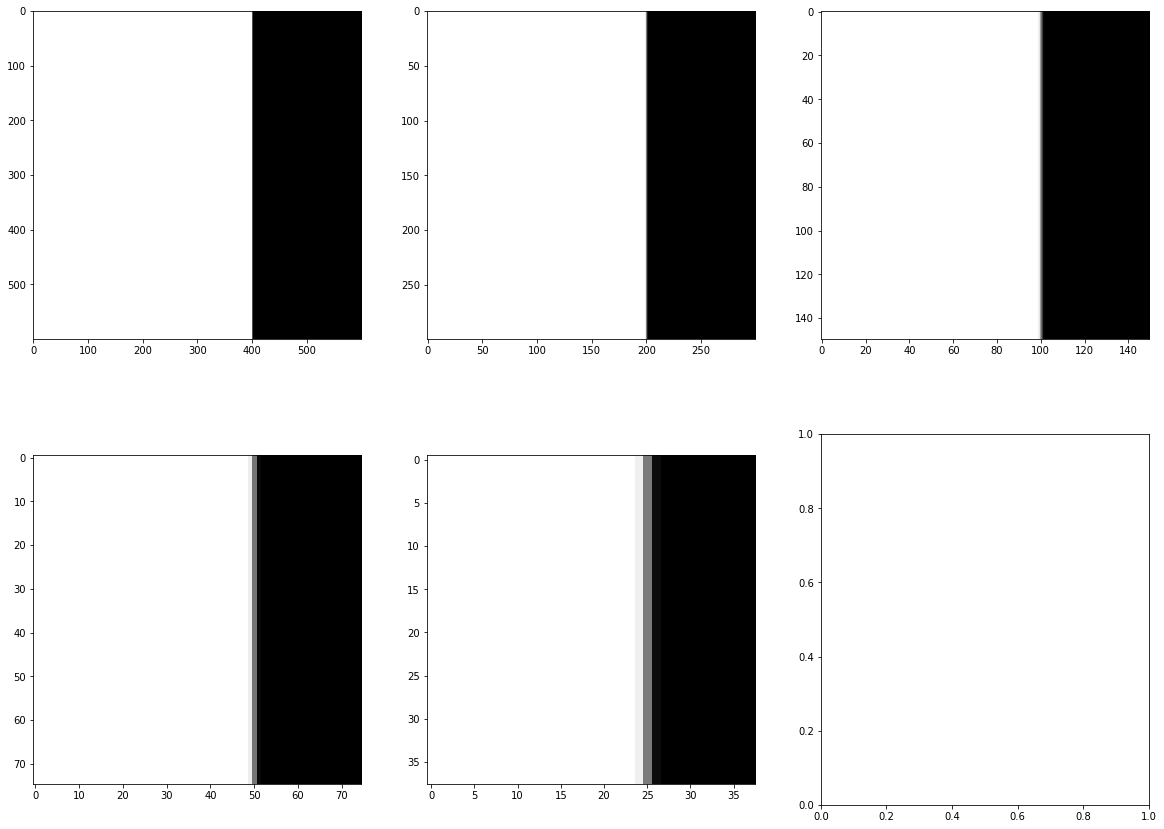

In [177]:
plot_pyramid(mask_gaussian_pyramid)

In [178]:
def construct_combine_laplacian_pyramid(left_laplacian_pyramid, right_laplacian_pyramid, mask_pyramid):
  combine_laplacian_pyramid = []
  for i in range(len(left_laplacian_pyramid)):
    combine_laplacian = (mask_pyramid[i]*left_laplacian_pyramid[i]) + ((1 - mask_pyramid[i]) * right_laplacian_pyramid[i])
    combine_laplacian_pyramid.append(combine_laplacian)
  return combine_laplacian_pyramid


In [179]:
combine_laplacian_pyramimd = construct_combine_laplacian_pyramid(apple_laplacian_pyramid,
                                                       orange_laplacian_pyramid,
                                                       mask_gaussian_pyramid)


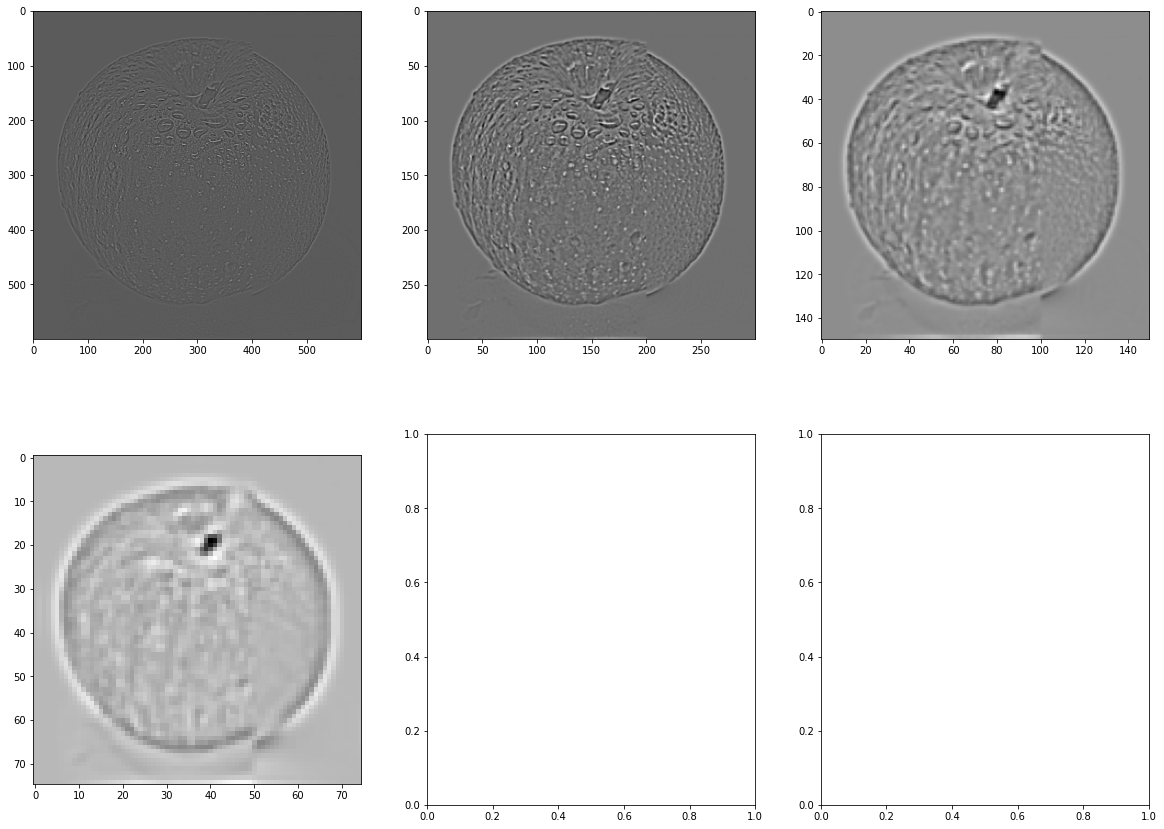

In [180]:
plot_pyramid(combine_laplacian_pyramimd)


In [169]:
def construct_combine_gaussian_pyramid(combine_laplacian_pyramimd):
  combine_gaussian_pyramid = []
  combine_gaussian_pyramid.append(combine_laplacian_pyramimd[-1])
  for i in range(len(combine_laplacian_pyramimd) - 2, -1, -1):
    expand_pyramid = expand(combine_laplacian_pyramimd[i], combine_gaussian_pyramid[-1], kernel_1D)
    # print(expand_pyramid.shape, combine_laplacian_pyramimd[i].shape, combine_gaussian_pyramid[-1].shape)
    combine_gaussian = expand_pyramid + combine_laplacian_pyramimd[i]
    combine_gaussian_pyramid.append(combine_gaussian)
  return combine_gaussian_pyramid


In [181]:
combine_gaussian_pyramid = construct_combine_gaussian_pyramid(combine_laplacian_pyramimd)


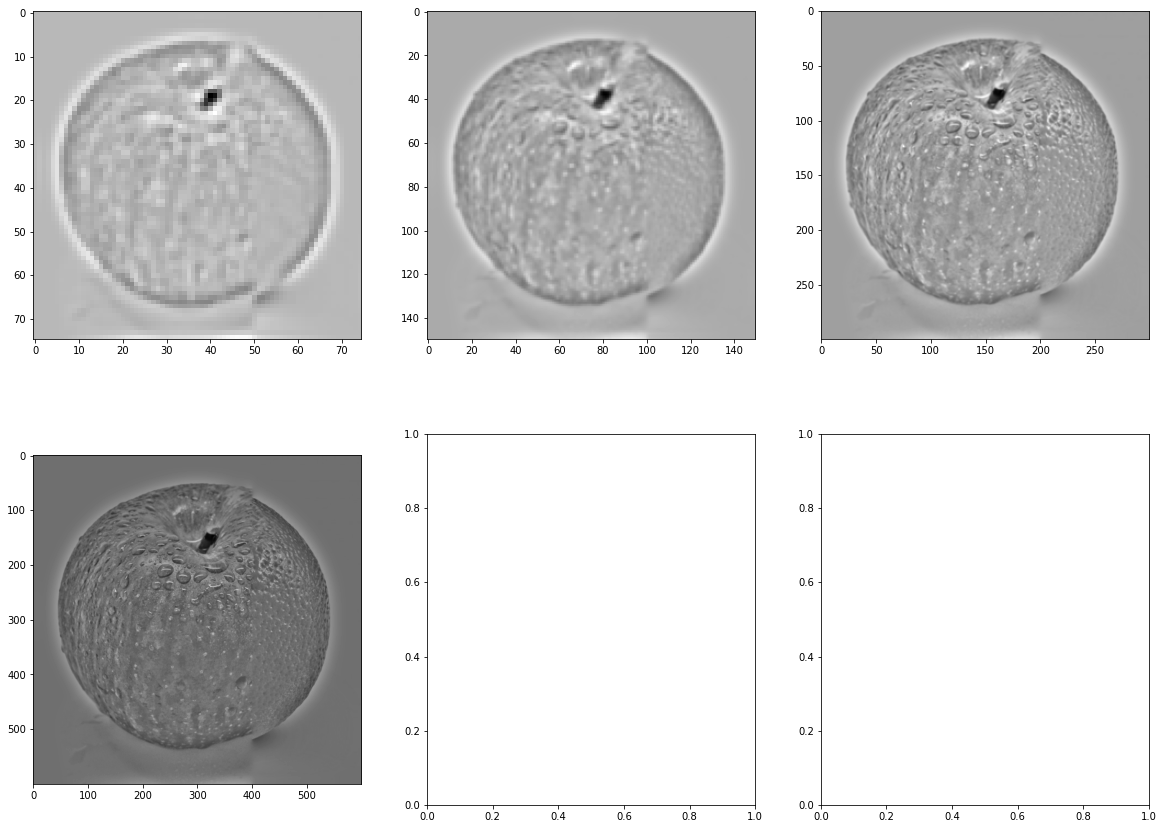

In [182]:
plot_pyramid(combine_gaussian_pyramid)

In [183]:
blend_image = combine_gaussian_pyramid[-1]

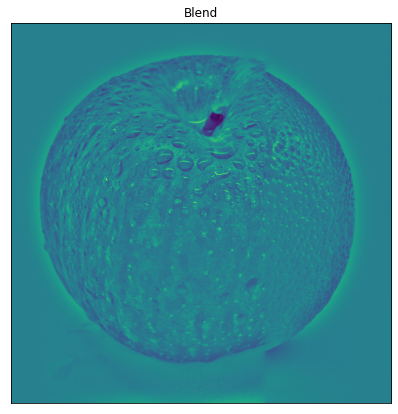

In [184]:
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(blend_image)
plt.title("Blend")
plt.xticks([])
plt.yticks([])
plt.show()

In [185]:
blend_image = np.float32(blend_image)

In [186]:
blend_color_img = cv2.cvtColor(blend_image, cv2.COLOR_GRAY2BGR)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


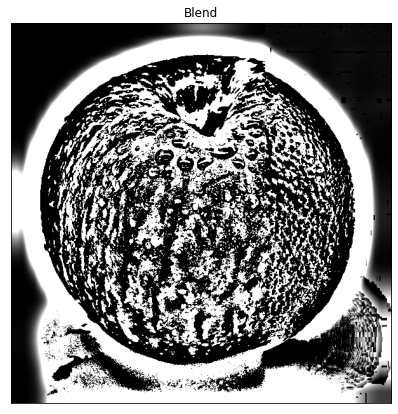

In [187]:
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(blend_color_img)
plt.title("Blend")
plt.xticks([])
plt.yticks([])
plt.show()